In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from functools import reduce
from sklearn import preprocessing
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor


In [4]:
import pickle

In [5]:
print(np.__version__) 

2.1.3


In [6]:
df_21 = pd.read_csv('Archivos/archivo21.csv')
df_21

,Unnamed: 0,Fecha,Temperatura_Media,Precipitaciones,Humedad_Relativa,Radiación_Solar,Velocidad_Viento
0,0,2021-02-01,11.3,0.00,73.0,132.0,3.2
1,1,2021-02-02,9.8,0.00,91.0,49.0,2.3
2,2,2021-02-03,10.0,0.00,88.0,49.0,1.4
3,3,2021-02-04,10.7,0.00,85.0,75.0,1.5
4,4,2021-02-05,11.7,0.13,75.0,124.0,1.6
...,...,...,...,...,...,...,...
360,360,2021-12-29,8.7,0.00,90.0,81.0,0.7
361,361,2021-12-30,8.1,0.00,79.0,99.0,0.6
362,362,2021-12-30,8.1,0.00,85.0,99.0,0.6
363,363,2021-12-31,8.3,0.00,77.0,101.0,0.7


In [7]:
df_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         365 non-null    int64  
 1   Fecha              365 non-null    object 
 2   Temperatura_Media  365 non-null    float64
 3   Precipitaciones    365 non-null    float64
 4   Humedad_Relativa   365 non-null    float64
 5   Radiación_Solar    365 non-null    float64
 6   Velocidad_Viento   365 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


In [8]:
df_21.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
df_21["Fecha"] = pd.to_datetime(df_21["Fecha"])
df_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Fecha              365 non-null    datetime64[ns]
 1   Temperatura_Media  365 non-null    float64       
 2   Precipitaciones    365 non-null    float64       
 3   Humedad_Relativa   365 non-null    float64       
 4   Radiación_Solar    365 non-null    float64       
 5   Velocidad_Viento   365 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 17.2 KB


In [10]:
df_21_dup = df_21.duplicated().any()
df_21_dup

np.True_

In [11]:
df_21_dup = df_21[df_21.duplicated(keep=False)]
df_21_dup

,Fecha,Temperatura_Media,Precipitaciones,Humedad_Relativa,Radiación_Solar,Velocidad_Viento
347,2021-12-23,8.3,0.1,94.0,50.0,1.0
348,2021-12-23,8.3,0.1,94.0,50.0,1.0


In [12]:
df_21_dup = df_21.drop_duplicates()
df_21_dup

,Fecha,Temperatura_Media,Precipitaciones,Humedad_Relativa,Radiación_Solar,Velocidad_Viento
0,2021-02-01,11.3,0.00,73.0,132.0,3.2
1,2021-02-02,9.8,0.00,91.0,49.0,2.3
2,2021-02-03,10.0,0.00,88.0,49.0,1.4
3,2021-02-04,10.7,0.00,85.0,75.0,1.5
4,2021-02-05,11.7,0.13,75.0,124.0,1.6
...,...,...,...,...,...,...
360,2021-12-29,8.7,0.00,90.0,81.0,0.7
361,2021-12-30,8.1,0.00,79.0,99.0,0.6
362,2021-12-30,8.1,0.00,85.0,99.0,0.6
363,2021-12-31,8.3,0.00,77.0,101.0,0.7


In [13]:
df_21_dup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 364
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Fecha              364 non-null    datetime64[ns]
 1   Temperatura_Media  364 non-null    float64       
 2   Precipitaciones    364 non-null    float64       
 3   Humedad_Relativa   364 non-null    float64       
 4   Radiación_Solar    364 non-null    float64       
 5   Velocidad_Viento   364 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 19.9 KB


In [14]:
df_22 = pd.read_csv('Archivos/archivo22.csv')
df_22

,Unnamed: 0,Fecha,Temperatura_Media,Precipitaciones,Humedad_Relativa,Radiación_Solar,Velocidad_Viento
0,0,2022-01-01,8.2,0.00,73.0,97.0,0.5
1,1,2022-01-02,7.5,0.00,77.0,89.0,0.6
2,2,2022-01-03,7.7,0.00,84.0,91.0,0.8
3,3,2022-01-04,5.4,0.24,90.0,30.0,1.7
4,4,2022-01-05,5.9,0.15,76.0,80.0,1.8
...,...,...,...,...,...,...,...
360,360,2022-12-27,8.1,0.00,84.0,NaN,0.7
361,361,2022-12-28,7.3,0.00,85.0,NaN,1.1
362,362,2022-12-29,9.9,0.00,89.0,NaN,2.4
363,363,2022-12-30,11.1,0.00,76.0,NaN,2.8


In [15]:
df_22.drop(columns=['Unnamed: 0'], inplace=True)

In [16]:
df_22["Fecha"] = pd.to_datetime(df_22["Fecha"])
df_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Fecha              365 non-null    datetime64[ns]
 1   Temperatura_Media  365 non-null    float64       
 2   Precipitaciones    304 non-null    float64       
 3   Humedad_Relativa   364 non-null    float64       
 4   Radiación_Solar    334 non-null    float64       
 5   Velocidad_Viento   365 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 17.2 KB


In [17]:
df_22.duplicated().any()


np.False_

In [18]:
df_23 = pd.read_csv('Archivos/archivo23.csv')
df_23

,Unnamed: 0,Fecha,Temperatura_Media,Precipitaciones,Humedad_Relativa,Radiación_Solar,Velocidad_Viento
0,0,2023-02-01,4.1,0.0,67.0,138.0,0.9
1,1,2023-02-02,6.0,0.0,64.0,136.0,0.7
2,2,2023-02-03,5.9,0.0,60.0,141.0,0.7
3,3,2023-02-04,6.6,0.0,56.0,144.0,0.7
4,4,2023-02-05,7.1,0.0,47.0,148.0,0.8
...,...,...,...,...,...,...,...
360,360,2023-12-29,4.4,0.0,88.0,38.0,0.6
361,361,2023-12-30,5.6,0.0,66.0,95.0,0.7
362,362,2023-12-30,5.6,0.0,82.0,95.0,0.7
363,363,2023-12-31,6.7,0.0,68.0,56.0,1.8


In [19]:
df_23.drop(columns=['Unnamed: 0'], inplace=True)

In [20]:
df_23["Fecha"] = pd.to_datetime(df_22["Fecha"])
df_23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Fecha              365 non-null    datetime64[ns]
 1   Temperatura_Media  365 non-null    float64       
 2   Precipitaciones    365 non-null    float64       
 3   Humedad_Relativa   365 non-null    float64       
 4   Radiación_Solar    365 non-null    float64       
 5   Velocidad_Viento   365 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 17.2 KB


In [21]:
df_23.duplicated().any()

np.False_

In [22]:
df_24 = pd.read_csv('Archivos/archivo24.csv')
df_24

,Unnamed: 0,Fecha,Temperatura_Media,Precipitaciones,Humedad_Relativa,Radiación_Solar,Velocidad_Viento
0,0,2023-02-01,4.1,0.0,67.0,138.0,0.9
1,1,2023-02-02,6.0,0.0,64.0,136.0,0.7
2,2,2023-02-03,5.9,0.0,60.0,141.0,0.7
3,3,2023-02-04,6.6,0.0,56.0,144.0,0.7
4,4,2023-02-05,7.1,0.0,47.0,148.0,0.8
...,...,...,...,...,...,...,...
360,360,2023-12-29,4.4,0.0,88.0,38.0,0.6
361,361,2023-12-30,5.6,0.0,66.0,95.0,0.7
362,362,2023-12-30,5.6,0.0,82.0,95.0,0.7
363,363,2023-12-31,6.7,0.0,68.0,56.0,1.8


In [23]:
df_24.drop(columns=['Unnamed: 0'], inplace=True)

In [24]:
df_24["Fecha"] = pd.to_datetime(df_24["Fecha"])
df_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Fecha              365 non-null    datetime64[ns]
 1   Temperatura_Media  365 non-null    float64       
 2   Precipitaciones    365 non-null    float64       
 3   Humedad_Relativa   365 non-null    float64       
 4   Radiación_Solar    365 non-null    float64       
 5   Velocidad_Viento   365 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 17.2 KB


In [25]:
df_24.duplicated().any()

np.False_

In [26]:
lista_años = [df_21_dup, df_22, df_23, df_24]

In [27]:
df_years = pd.concat(lista_años, ignore_index=True)
df_years

,Fecha,Temperatura_Media,Precipitaciones,Humedad_Relativa,Radiación_Solar,Velocidad_Viento
0,2021-02-01,11.3,0.00,73.0,132.0,3.2
1,2021-02-02,9.8,0.00,91.0,49.0,2.3
2,2021-02-03,10.0,0.00,88.0,49.0,1.4
3,2021-02-04,10.7,0.00,85.0,75.0,1.5
4,2021-02-05,11.7,0.13,75.0,124.0,1.6
...,...,...,...,...,...,...
1454,2023-12-29,4.4,0.00,88.0,38.0,0.6
1455,2023-12-30,5.6,0.00,66.0,95.0,0.7
1456,2023-12-30,5.6,0.00,82.0,95.0,0.7
1457,2023-12-31,6.7,0.00,68.0,56.0,1.8


In [28]:
df_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Fecha              1459 non-null   datetime64[ns]
 1   Temperatura_Media  1459 non-null   float64       
 2   Precipitaciones    1398 non-null   float64       
 3   Humedad_Relativa   1458 non-null   float64       
 4   Radiación_Solar    1428 non-null   float64       
 5   Velocidad_Viento   1459 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 68.5 KB


In [29]:
df_v = pd.read_csv('Archivos/archivo_ventas.csv')
df_v

,Unnamed: 0,Fecha,Ventas
0,0,2021-01-13,54.00
1,1,2021-01-14,50.15
2,2,2021-01-15,75.50
3,3,2021-01-16,89.45
4,4,2021-01-17,205.55
...,...,...,...
1182,1182,2024-12-24,321.40
1183,1183,2024-12-27,184.40
1184,1184,2024-12-28,170.78
1185,1185,2024-12-29,248.40


In [30]:
df_v.drop(columns=['Unnamed: 0'], inplace=True)

In [31]:
df_v["Fecha"] = pd.to_datetime(df_v["Fecha"])
df_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   1187 non-null   datetime64[ns]
 1   Ventas  1187 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 18.7 KB


In [32]:
df_v.duplicated().any()

np.False_

In [33]:
df_v

,Fecha,Ventas
0,2021-01-13,54.00
1,2021-01-14,50.15
2,2021-01-15,75.50
3,2021-01-16,89.45
4,2021-01-17,205.55
...,...,...
1182,2024-12-24,321.40
1183,2024-12-27,184.40
1184,2024-12-28,170.78
1185,2024-12-29,248.40


In [34]:
df = pd.merge(df_years, df_v, on='Fecha', how='inner')
df.head(800)

,Fecha,Temperatura_Media,Precipitaciones,Humedad_Relativa,Radiación_Solar,Velocidad_Viento,Ventas
0,2021-02-01,11.3,0.00,73.0,132.0,3.2,76.55
1,2021-02-03,10.0,0.00,88.0,49.0,1.4,46.88
2,2021-02-04,10.7,0.00,85.0,75.0,1.5,100.06
3,2021-02-05,11.7,0.13,75.0,124.0,1.6,377.79
4,2021-02-06,8.7,0.05,91.0,60.0,1.4,292.16
...,...,...,...,...,...,...,...
795,2022-07-16,27.3,0.00,27.0,309.0,1.5,491.10
796,2022-07-17,27.1,0.00,29.0,307.0,1.6,706.95
797,2022-07-18,26.8,0.00,26.0,280.0,2.3,307.45
798,2022-07-19,28.2,0.00,31.0,299.0,1.5,477.65


In [156]:
# Guardar dataframe en csv
df.to_csv('archivoHelados.csv', index=False)

In [157]:
df_p = pd.read_csv("archivoHelados.csv")
df_p

,Fecha,Temperatura_Media,Precipitaciones,Humedad_Relativa,Radiación_Solar,Velocidad_Viento,Ventas,Año,Mes,Fin_de_semana_o_festivo,Estación_Año,Interacción_temp_humedad,cluster,Cluster
0,2021-02-01,11.3,0.00,73.0,132.0,3.2,76.55,2021,2,0,0,824.9,1,1
1,2021-02-03,10.0,0.00,88.0,49.0,1.4,46.88,2021,2,0,0,880.0,1,1
2,2021-02-04,10.7,0.00,85.0,75.0,1.5,100.06,2021,2,0,0,909.5,1,1
3,2021-02-05,11.7,0.13,75.0,124.0,1.6,377.79,2021,2,0,0,877.5,1,1
4,2021-02-06,8.7,0.05,91.0,60.0,1.4,292.16,2021,2,1,0,791.7,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,2023-12-26,3.0,0.00,86.0,100.0,0.6,104.95,2023,12,0,0,258.0,1,1
1240,2023-12-27,3.2,0.00,62.0,101.0,0.6,91.64,2023,12,0,0,198.4,1,1
1241,2023-12-27,3.2,0.00,82.0,101.0,0.6,91.64,2023,12,0,0,262.4,1,1
1242,2023-12-28,2.6,0.00,57.0,54.0,0.5,154.51,2023,12,0,0,148.2,1,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Fecha              1244 non-null   datetime64[ns]
 1   Temperatura_Media  1244 non-null   float64       
 2   Precipitaciones    1189 non-null   float64       
 3   Humedad_Relativa   1243 non-null   float64       
 4   Radiación_Solar    1222 non-null   float64       
 5   Velocidad_Viento   1244 non-null   float64       
 6   Ventas             1244 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 68.2 KB


In [37]:
df.describe()

,Fecha,Temperatura_Media,Precipitaciones,Humedad_Relativa,Radiación_Solar,Velocidad_Viento,Ventas
count,1244,1244.00000,1189.000000,1243.000000,1222.000000,1244.000000,1244.000000
mean,2022-07-12 21:36:27.781350400,16.28825,0.038311,58.423765,203.454330,1.491604,411.397452
min,2021-02-01 00:00:00,1.10000,0.000000,17.000000,13.000000,0.400000,24.900000
25%,2021-12-27 00:00:00,9.80000,0.000000,41.000000,108.000000,1.000000,175.332500
50%,2022-06-30 12:00:00,15.80000,0.000000,59.000000,206.000000,1.400000,354.170000
75%,2022-12-27 00:00:00,22.20000,0.000000,75.000000,293.000000,1.900000,564.007500
max,2023-12-28 00:00:00,33.80000,1.930000,100.000000,547.000000,4.000000,1884.600000
std,NaN,7.74774,0.153624,20.048877,99.360145,0.676550,287.140713


In [38]:
df['Precipitaciones'] = df['Precipitaciones'].fillna(0)
df['Humedad_Relativa'] = df['Humedad_Relativa'].fillna(df['Humedad_Relativa'].mean())
df['Radiación_Solar'] = df['Radiación_Solar'].fillna(df['Radiación_Solar'].mean())

In [39]:
df

,Fecha,Temperatura_Media,Precipitaciones,Humedad_Relativa,Radiación_Solar,Velocidad_Viento,Ventas
0,2021-02-01,11.3,0.00,73.0,132.0,3.2,76.55
1,2021-02-03,10.0,0.00,88.0,49.0,1.4,46.88
2,2021-02-04,10.7,0.00,85.0,75.0,1.5,100.06
3,2021-02-05,11.7,0.13,75.0,124.0,1.6,377.79
4,2021-02-06,8.7,0.05,91.0,60.0,1.4,292.16
...,...,...,...,...,...,...,...
1239,2023-12-26,3.0,0.00,86.0,100.0,0.6,104.95
1240,2023-12-27,3.2,0.00,62.0,101.0,0.6,91.64
1241,2023-12-27,3.2,0.00,82.0,101.0,0.6,91.64
1242,2023-12-28,2.6,0.00,57.0,54.0,0.5,154.51


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Fecha              1244 non-null   datetime64[ns]
 1   Temperatura_Media  1244 non-null   float64       
 2   Precipitaciones    1244 non-null   float64       
 3   Humedad_Relativa   1244 non-null   float64       
 4   Radiación_Solar    1244 non-null   float64       
 5   Velocidad_Viento   1244 non-null   float64       
 6   Ventas             1244 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 68.2 KB


In [41]:
# Extraer año y mes
df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month

In [42]:
# Agrupar por mes y año y calcular la media de ventas
ventas_mensuales = df.groupby(['Año', 'Mes'])['Ventas'].mean().reset_index()

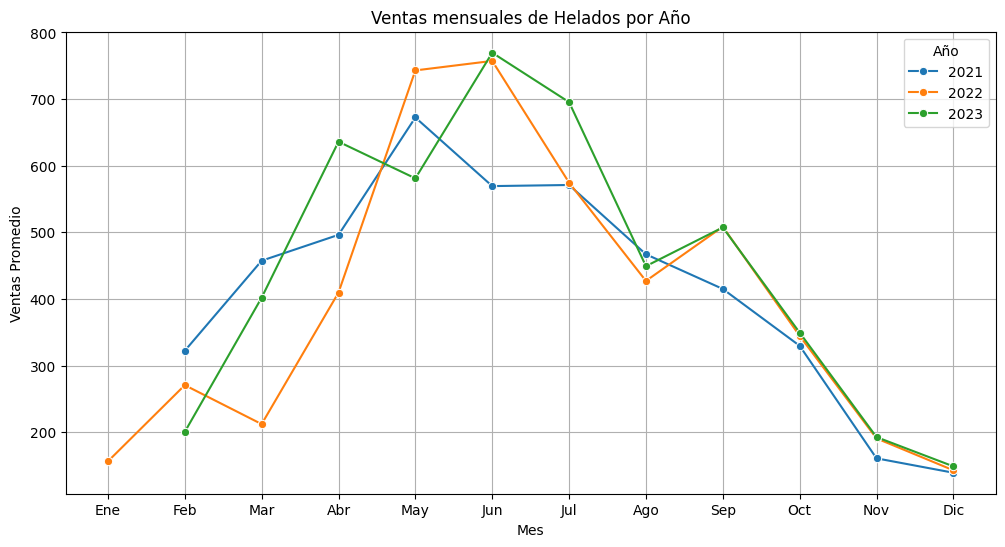

In [43]:

# Configurar el gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=ventas_mensuales, x='Mes', y='Ventas', hue='Año', marker='o', palette='tab10')
# Etiquetas y título
plt.xlabel('Mes')
plt.ylabel('Ventas Promedio')
plt.title('Ventas mensuales de Helados por Año')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(title='Año')
plt.grid(True)

In [44]:
#Días de mayores Ventas por año

df['Año'] = df['Fecha'].dt.year

dias_max_ventas = df.loc[df.groupby('Año')['Ventas'].idxmax(), ['Fecha', 'Año', 'Ventas']]

print(dias_max_ventas)


          Fecha   Año   Ventas
100  2021-05-30  2021  1373.95
416  2022-05-01  2022  1438.25
1020 2023-05-07  2023  1884.60


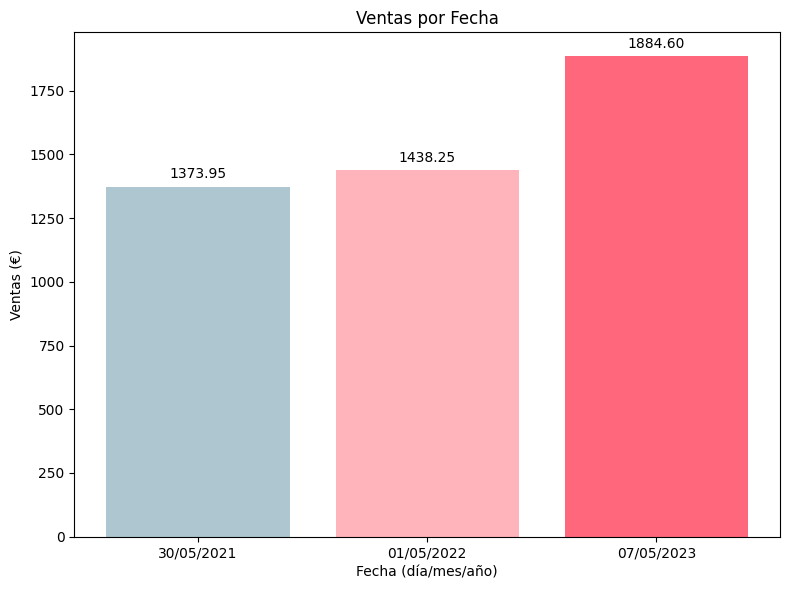

In [45]:
import datetime
# Datos
fechas_str = ["2021-05-30", "2022-05-01", "2023-05-07"]
ventas = [1373.95, 1438.25, 1884.60]

# Convertir las cadenas de fecha a objetos datetime y formatearlas como "día/mes/año"
fechas = [datetime.datetime.strptime(fecha, '%Y-%m-%d') for fecha in fechas_str]
fechas_label = [fecha.strftime('%d/%m/%Y') for fecha in fechas]

colores_pastel = ['#AEC6CF', '#FFB3BA', '#FF677D']

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
barras = plt.bar(fechas_label, ventas, color=colores_pastel)

# Añadir etiquetas y título
plt.xlabel("Fecha (día/mes/año)")
plt.ylabel("Ventas (€)")
plt.title("Ventas por Fecha")

# Añadir el valor de las ventas encima de cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, altura + 20, f'{altura:.2f}', 
             ha='center', va='bottom')

plt.tight_layout()



In [46]:
#Días de menores ventas por año

df['Año'] = df['Fecha'].dt.year

dias_min_ventas = df.loc[df.groupby('Año')['Ventas'].idxmin(), ['Fecha', 'Año', 'Ventas']]

print(dias_min_ventas)

          Fecha   Año  Ventas
308  2021-12-26  2021   24.90
336  2022-02-01  2022   39.55
1206 2023-12-09  2023   31.66


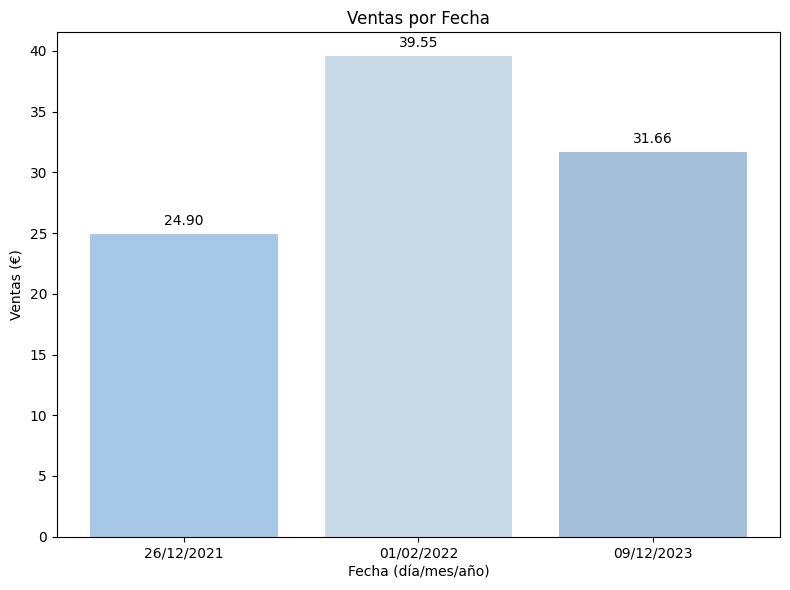

In [47]:
import datetime
# Datos
fechas_str = ["2021-12-26", "2022-02-01", "2023-12-09"]
ventas = [24.90, 39.55, 31.66]


# Convertir las cadenas de fecha a objetos datetime y formatearlas como "día/mes/año"
fechas = [datetime.datetime.strptime(fecha, '%Y-%m-%d') for fecha in fechas_str]
fechas_label = [fecha.strftime('%d/%m/%Y') for fecha in fechas]

colores_pastel = ['#A7C7E7', '#C8D9E8', '#A3BFD9']

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
barras = plt.bar(fechas_label, ventas, color=colores_pastel)

# Añadir etiquetas y título
plt.xlabel("Fecha (día/mes/año)")
plt.ylabel("Ventas (€)")
plt.title("Ventas por Fecha")

# Añadir el valor de las ventas encima de cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, altura + 0.5, f'{altura:.2f}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


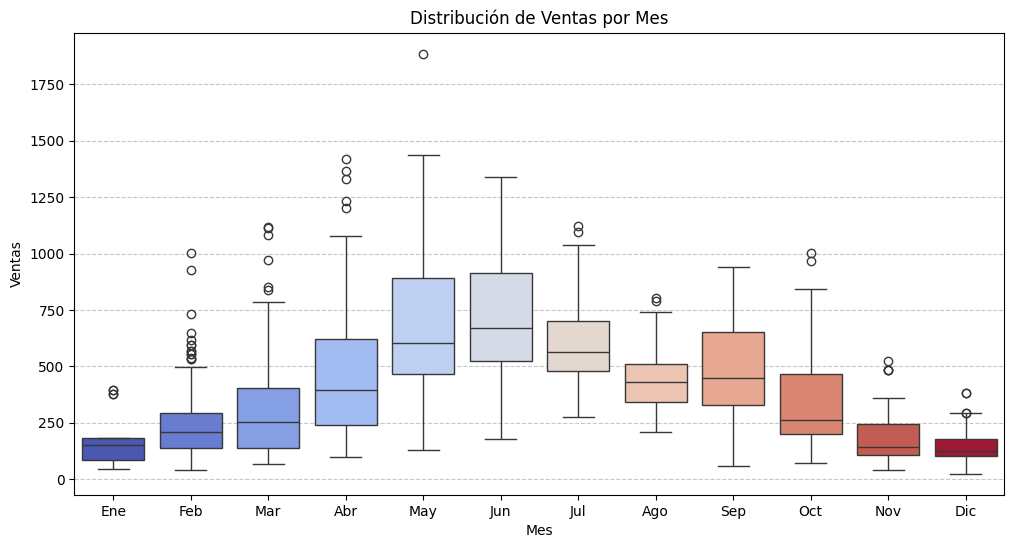

In [48]:
# Extraer el mes de la fecha
df["Mes"] = df["Fecha"].dt.month

# Graficar la distribución de las ventas por mes
plt.figure(figsize=(12, 6))
sns.boxplot(x="Mes", y="Ventas", data=df, hue="Mes", palette="coolwarm", legend=False)

# Personalizar el gráfico
plt.xlabel("Mes")
plt.ylabel("Ventas")
plt.title("Distribución de Ventas por Mes")
plt.xticks(ticks=range(12), labels=["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])
plt.grid(axis="y", linestyle="--", alpha=0.7)

In [49]:
# Detectar valores Outliers. Seleccionar solo columnas numéricas.
df_numericas = df.select_dtypes(include=[np.number])

def detectar_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
    return outliers

outliers_iqr = detectar_outliers_iqr(df_numericas)

print("Número de outliers por columna (IQR):")
print(outliers_iqr.sum())



Número de outliers por columna (IQR):
Temperatura_Media      0
Precipitaciones      225
Humedad_Relativa       0
Radiación_Solar        0
Velocidad_Viento      25
Ventas                25
Año                    0
Mes                    0
dtype: int64


In [50]:
corr = df.corr()
corr

,Fecha,Temperatura_Media,Precipitaciones,Humedad_Relativa,Radiación_Solar,Velocidad_Viento,Ventas,Año,Mes
Fecha,1.000000,-0.011247,0.022691,0.093466,-0.103532,-0.195570,-0.048626,0.930528,0.356716
Temperatura_Media,-0.011247,1.000000,-0.050035,-0.728663,0.748526,0.253168,0.557412,0.014708,-0.066241
Precipitaciones,0.022691,-0.050035,1.000000,0.284243,-0.200984,0.111634,-0.075630,-0.006067,0.078320
Humedad_Relativa,0.093466,-0.728663,0.284243,1.000000,-0.816949,-0.147404,-0.480300,-0.022426,0.309258
Radiación_Solar,-0.103532,0.748526,-0.200984,-0.816949,1.000000,0.240969,0.598620,0.030630,-0.356767
Velocidad_Viento,-0.195570,0.253168,0.111634,-0.147404,0.240969,1.000000,0.134262,-0.146576,-0.158927
Ventas,-0.048626,0.557412,-0.075630,-0.480300,0.598620,0.134262,1.000000,0.031110,-0.207535
Año,0.930528,0.014708,-0.006067,-0.022426,0.030630,-0.146576,0.031110,1.000000,-0.008712
Mes,0.356716,-0.066241,0.078320,0.309258,-0.356767,-0.158927,-0.207535,-0.008712,1.000000


Text(0.5, 1.0, 'Distribución de Ventas')

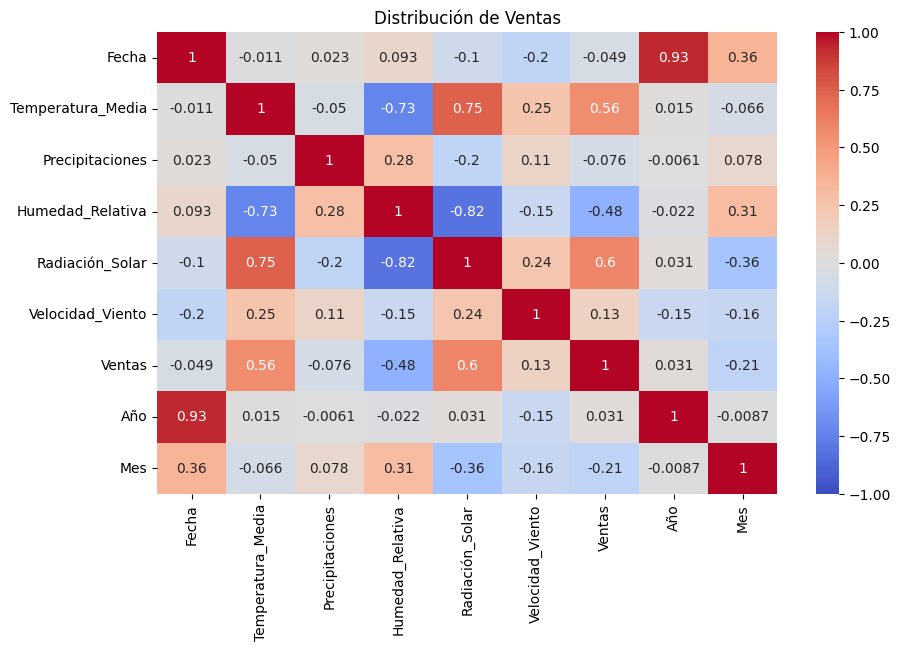

In [51]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.title("Distribución de Ventas")

####  La variable 'target' tiene mayor correlación positiva con la variable predictora 'Radiación_Solar' y mayor correlación negativa con la variable 'Humedad_Relativa'

In [52]:
#Verificar la cantidad de datos que tengo en el df
print(df.shape)

(1244, 9)


In [53]:
#Verifico la información de las columnas
print(df.columns)

Index(['Fecha', 'Temperatura_Media', 'Precipitaciones', 'Humedad_Relativa',
       'Radiación_Solar', 'Velocidad_Viento', 'Ventas', 'Año', 'Mes'],
      dtype='object')


_______________________________________________________________________________________________

## Feature Engineering

### Variables Temporales (predictoras)
1. Fines de semana o festivos: Variable binaria(1: si es fin de semana o festivo, 0: si no)
2. Estación del año: Variable de estacionalidad numérica.
3. Interacción entre temperatura y humedad: Variable númerica continua, derivada de la multiplicación de ambas variables.


In [54]:
#Asegurar que la fecha es de tipo datetime
fecha =pd.to_datetime(2021-12-25)

In [55]:
#Diccionario de los festivos en España(Madrid) años 2021, 2022, 2023 y 2024
festivos_agno = {
    2021: ['2021-01-01', '2021-05-01', '2021-08-15', '2021-10-12', '2021-11-01', '2021-12-06', '2021-12-08', '2021-12-25'],
    2022: ['2022-01-01', '2022-05-01', '2022-08-15', '2022-10-12', '2022-11-01', '2022-12-06', '2022-12-08', '2022-12-25'],
    2023: ['2023-01-01', '2023-05-01', '2023-08-15', '2023-10-12', '2023-11-01', '2023-12-06', '2023-12-08', '2023-12-25'],
    2024: ['2024-01-01', '2024-05-01', '2024-08-15', '2024-10-12', '2024-11-01', '2024-12-06', '2024-12-08', '2024-12-25']
} 

In [56]:
# Convertir las fechas festivas a datetime
festivos = pd.to_datetime(sum(festivos_agno.values(), []))

In [57]:
# Crear la columna fin de semana o festivo.

df['Fin_de_semana_o_festivo'] = ((df['Fecha'].dt.weekday >= 5) | (df['Fecha'].isin(festivos))).astype(int)

"""df['fecha'].dt.weekday >= 5 → Verifica si la fecha corresponde a un sábado (5) o domingo (6).
df['fecha'].isin(festivos) → Comprueba si la fecha está en la lista de días festivos.
.astype(int) → Convierte el resultado a 1 o 0."""

"df['fecha'].dt.weekday >= 5 → Verifica si la fecha corresponde a un sábado (5) o domingo (6).\ndf['fecha'].isin(festivos) → Comprueba si la fecha está en la lista de días festivos.\n.astype(int) → Convierte el resultado a 1 o 0."

In [58]:
print(df[['Fecha', 'Fin_de_semana_o_festivo']])

          Fecha  Fin_de_semana_o_festivo
0    2021-02-01                        0
1    2021-02-03                        0
2    2021-02-04                        0
3    2021-02-05                        0
4    2021-02-06                        1
...         ...                      ...
1239 2023-12-26                        0
1240 2023-12-27                        0
1241 2023-12-27                        0
1242 2023-12-28                        0
1243 2023-12-28                        0

[1244 rows x 2 columns]


In [59]:
fecha = '2024-10-12'  # Fecha a verificar
es_festivo = pd.to_datetime(fecha) in festivos
print(f"¿{fecha} es festivo?:", es_festivo)

¿2024-10-12 es festivo?: True


In [60]:
fecha = '2021-12-25'  # Fecha a verificar
es_festivo = pd.to_datetime(fecha) in festivos
print(f"¿{fecha} es festivo?:", es_festivo)

¿2021-12-25 es festivo?: True


In [61]:
fecha = '2024-11-01'  # Fecha a verificar
es_festivo = pd.to_datetime(fecha) in festivos
print(f"¿{fecha} es festivo?:", es_festivo)

¿2024-11-01 es festivo?: True


In [62]:
#Crear la variable Estación
# Asignar el número de mes
df['Mes'] = df['Fecha'].dt.month

# Crear la columna 'Estación' (1 = primavera/verano, 0 = otoño/invierno)
df['Estación_Año'] = df['Mes'].apply(lambda x: 1 if x in [3, 4, 5, 6, 7, 8] else 0)

#Los meses [3, 4, 5, 6, 7, 8] corresponden a primavera y verano en el hemisferio norte.

print(df[['Fecha', 'Estación_Año']])

          Fecha  Estación_Año
0    2021-02-01             0
1    2021-02-03             0
2    2021-02-04             0
3    2021-02-05             0
4    2021-02-06             0
...         ...           ...
1239 2023-12-26             0
1240 2023-12-27             0
1241 2023-12-27             0
1242 2023-12-28             0
1243 2023-12-28             0

[1244 rows x 2 columns]


In [63]:
#Crear variable de interacción entre humedad y temperatura
# Crear la variable de interacción entre temperatura y humedad
df['Interacción_temp_humedad'] = df['Temperatura_Media'] * df['Humedad_Relativa']

print(df[['Temperatura_Media', 'Humedad_Relativa', 'Interacción_temp_humedad']])


      Temperatura_Media  Humedad_Relativa  Interacción_temp_humedad
0                  11.3              73.0                     824.9
1                  10.0              88.0                     880.0
2                  10.7              85.0                     909.5
3                  11.7              75.0                     877.5
4                   8.7              91.0                     791.7
...                 ...               ...                       ...
1239                3.0              86.0                     258.0
1240                3.2              62.0                     198.4
1241                3.2              82.0                     262.4
1242                2.6              57.0                     148.2
1243                2.6              86.0                     223.6

[1244 rows x 3 columns]


In [64]:
df.head()

,Fecha,Temperatura_Media,Precipitaciones,Humedad_Relativa,Radiación_Solar,Velocidad_Viento,Ventas,Año,Mes,Fin_de_semana_o_festivo,Estación_Año,Interacción_temp_humedad
0,2021-02-01,11.3,0.00,73.0,132.0,3.2,76.55,2021,2,0,0,824.9
1,2021-02-03,10.0,0.00,88.0,49.0,1.4,46.88,2021,2,0,0,880.0
2,2021-02-04,10.7,0.00,85.0,75.0,1.5,100.06,2021,2,0,0,909.5
3,2021-02-05,11.7,0.13,75.0,124.0,1.6,377.79,2021,2,0,0,877.5
4,2021-02-06,8.7,0.05,91.0,60.0,1.4,292.16,2021,2,1,0,791.7


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Fecha                     1244 non-null   datetime64[ns]
 1   Temperatura_Media         1244 non-null   float64       
 2   Precipitaciones           1244 non-null   float64       
 3   Humedad_Relativa          1244 non-null   float64       
 4   Radiación_Solar           1244 non-null   float64       
 5   Velocidad_Viento          1244 non-null   float64       
 6   Ventas                    1244 non-null   float64       
 7   Año                       1244 non-null   int32         
 8   Mes                       1244 non-null   int32         
 9   Fin_de_semana_o_festivo   1244 non-null   int64         
 10  Estación_Año              1244 non-null   int64         
 11  Interacción_temp_humedad  1244 non-null   float64       
dtypes: datetime64[ns](1)

In [66]:
df.describe()

,Fecha,Temperatura_Media,Precipitaciones,Humedad_Relativa,Radiación_Solar,Velocidad_Viento,Ventas,Año,Mes,Fin_de_semana_o_festivo,Estación_Año,Interacción_temp_humedad
count,1244,1244.00000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000
mean,2022-07-12 21:36:27.781350400,16.28825,0.036618,58.423765,203.454330,1.491604,411.397452,2021.987138,7.036977,0.329582,0.517685,838.571537
min,2021-02-01 00:00:00,1.10000,0.000000,17.000000,13.000000,0.400000,24.900000,2021.000000,1.000000,0.000000,0.000000,58.300000
25%,2021-12-27 00:00:00,9.80000,0.000000,41.000000,111.750000,1.000000,175.332500,2021.000000,4.000000,0.000000,0.000000,641.250000
50%,2022-06-30 12:00:00,15.80000,0.000000,59.000000,203.454330,1.400000,354.170000,2022.000000,7.000000,0.000000,1.000000,830.800000
75%,2022-12-27 00:00:00,22.20000,0.000000,75.000000,291.250000,1.900000,564.007500,2022.000000,10.000000,1.000000,1.000000,1044.250000
max,2023-12-28 00:00:00,33.80000,1.930000,100.000000,547.000000,4.000000,1884.600000,2023.000000,12.000000,1.000000,1.000000,1672.500000
std,NaN,7.74774,0.150393,20.040811,98.476926,0.676550,287.140713,0.708411,3.311928,0.470250,0.499888,301.695885


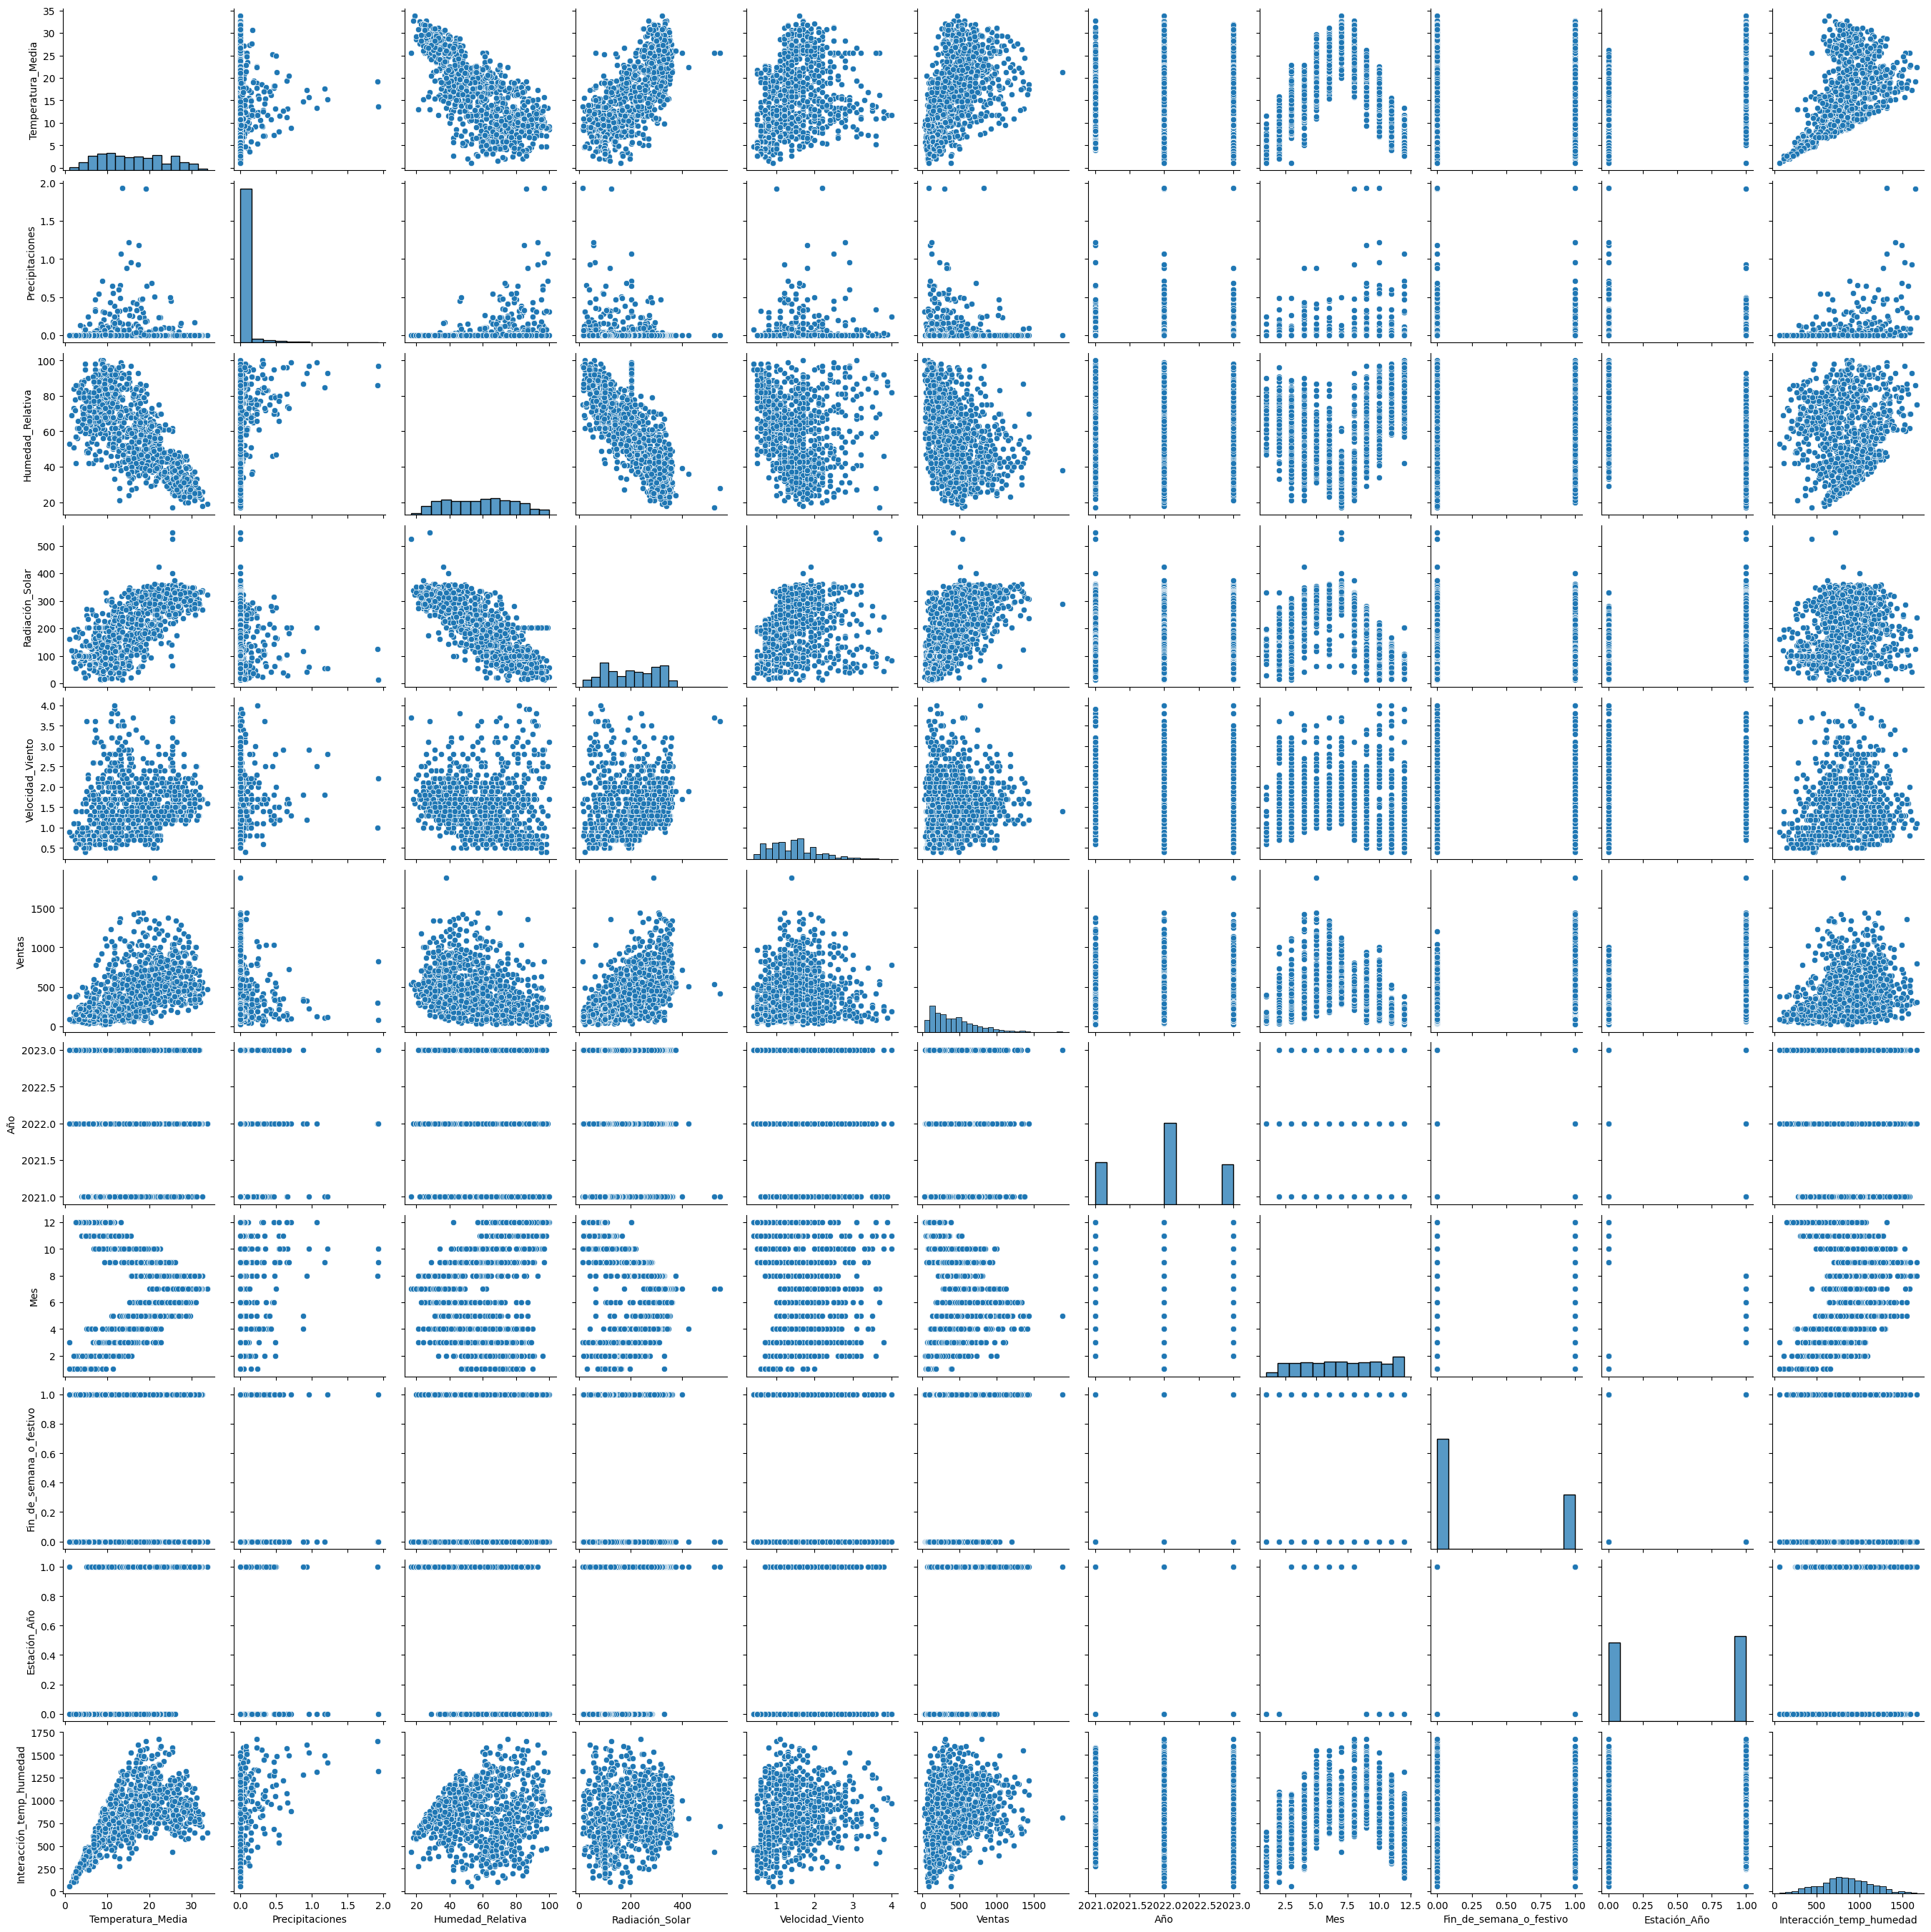

In [67]:
sns.pairplot(df)

Text(0.5, 1.0, 'Distribución de Ventas')

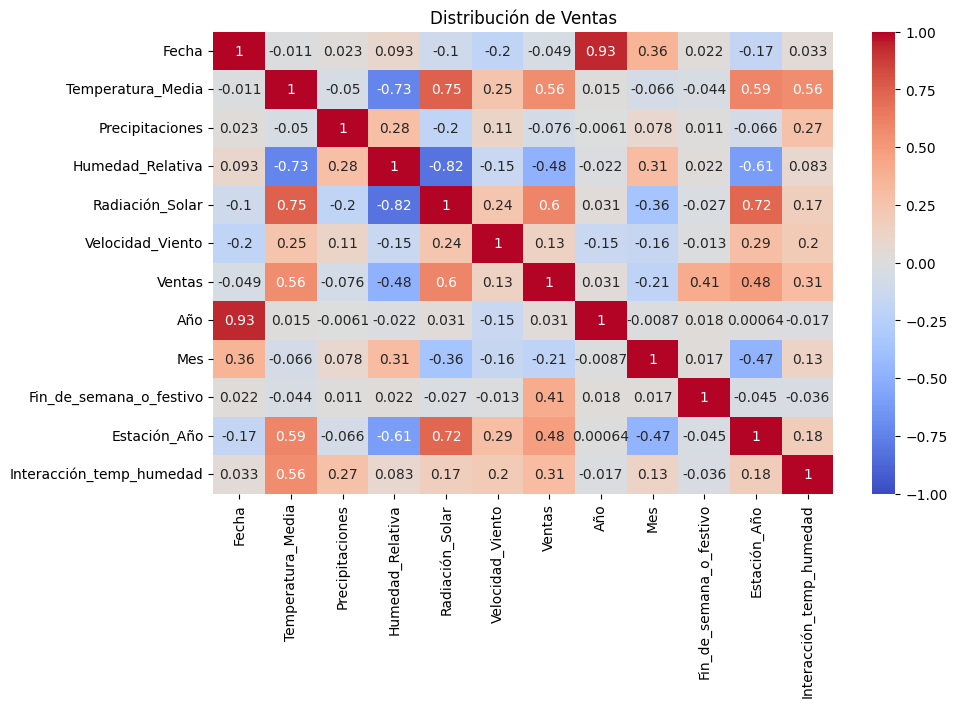

In [68]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.title("Distribución de Ventas")

### 1. Tendencia Estacional

Ventas más altas en primavera y verano (Abril - Septiembre), con los meses de Mayo, Junio, Julio y Agosto mostrando medianas elevadas y mayor dispersión.
Ventas más bajas en invierno (Diciembre - Febrero), con menores valores máximos y menos variabilidad.

### 2. Distribución de Ventas por Mes

La línea dentro de cada caja representa la mediana (valor central de las ventas).
La altura de la caja representa el rango intercuartílico (IQR), es decir, la dispersión del 50% de los datos.
Bigotes (líneas verticales) muestran el rango de valores sin considerar los atípicos.
Puntos fuera de los bigotes son outliers (valores atípicos), que pueden indicar días con ventas inusualmente altas o bajas.

### 3. Meses Clave

Abril, Mayo y Junio tienen una mayor dispersión y valores máximos elevados, indicando picos de ventas posiblemente relacionados con el inicio del calor.
Julio y Agosto mantienen buenas ventas pero con menor variabilidad.
Octubre - Diciembre muestran valores más bajos y estables, con poca dispersión.

### 4. Outliers

Hay valores atípicos en casi todos los meses. Esto indica que hubo algunos días con ventas excepcionalmente altas, posiblemente en fines de semana,festivos o cambios bruscos en el clima.
Estos valores atípicos son relevantes, porque represntan altas ventas con lo cual se aplicará una transformación logarítmica o de raíz cuadrada para reducir la influencia de estos valores sin tener que eliminarlos. Estas transformaciones hacen que los valores grandes tengan un impacto más pequeño y ayudan a estabilizar la varianza.

### Conclusión

1. La heladería parece vender más en meses cálidos, lo cual es lógico para un negocio de helados.
2. Hay una clara temporada alta entre abril y septiembre y una temporada baja entre octubre y febrero.
3. Se pueden explorar estrategias de promoción para los meses con menores ventas.

##### La variables features (Temperatura_Media, Estación_Año, Humedad_Relativa, Fin_de_semana_o_festivo, Radiación_Solar) son las que mayor correlación tienen con la variable Target(Ventas).

_____________________________________________________________________________________________________________________________________________________________________

#### Modelo Machine Learning No Supervisado. Aplicación de Clustering (K-Means)

In [69]:
columnas_predictoras = ['Temperatura_Media', 'Estación_Año', 'Humedad_Relativa', 
                        'Fin_de_semana_o_festivo', 'Radiación_Solar']
X = df[columnas_predictoras]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [70]:
from sklearn.cluster import KMeans
#Definir y ajustar el modelo K-means 
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [71]:
#Agregar los clusters al DataFrame
df['cluster'] = clusters

In [72]:
#Ver la distribución de clusters
print(df.groupby('cluster').mean())

                                Fecha  Temperatura_Media  Precipitaciones  \
cluster                                                                     
0       2022-06-21 03:58:57.117903872          20.799217         0.015491   
1       2022-09-03 18:50:31.578947328           9.021115         0.059540   
2       2022-05-25 23:03:31.764705792          15.964837         0.049765   
3       2022-06-20 03:47:22.105263104          24.062171         0.007120   

         Humedad_Relativa  Radiación_Solar  Velocidad_Viento      Ventas  \
cluster                                                                    
0               46.045848       272.693550          1.600244  781.353406   
1               76.835840       103.995743          1.316922  217.741250   
2               61.721569       192.988235          1.459608  314.368235   
3               37.363558       309.264159          1.698627  504.587467   

                 Año       Mes  Fin_de_semana_o_festivo  Estación_Año  \
cluster

Text(0.5, 1.0, 'Clusters de días según condiciones climáticas')

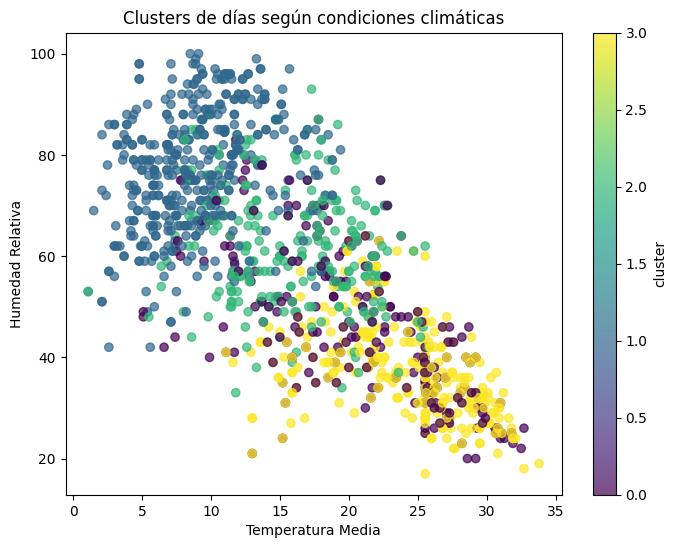

In [73]:
# Visualizar la distribución de clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Temperatura_Media'], df['Humedad_Relativa'], c=df['cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(label="cluster")
plt.xlabel('Temperatura Media')
plt.ylabel('Humedad Relativa')
plt.title('Clusters de días según condiciones climáticas')

In [74]:
print(f'Inertia (WCSS): {kmeans.inertia_}')

Inertia (WCSS): 2132.9854085219513


Text(0.5, 1.0, 'Método del Codo para seleccionar k')

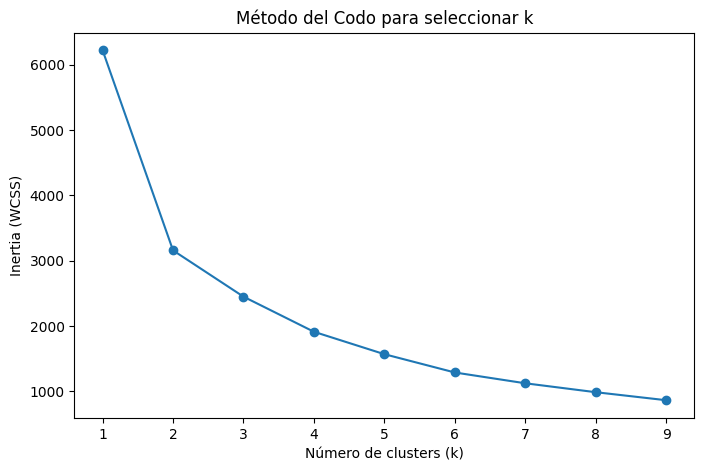

In [75]:

inertias = []
K_range = range(1, 10)  # Prueba con diferentes valores de k

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Graficar la curva de Elbow
plt.figure(figsize=(8,5))
plt.plot(K_range, inertias, marker='o', linestyle='-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Método del Codo para seleccionar k')


##### El codo es el punto donde la disminución de inercia se vuelve menos pronunciada. En este gráfico parece estar en k=3 o k=4.
##### Si elijo k=3, se obtienen clusters diferenciados sin sobreajustar.
##### Si elijo k=4, se obtiene una segmentación más fina, pero con menor diferencia entre clusters.

In [76]:
from sklearn.metrics import silhouette_score
#Calcular el coeficiente de Silhouette
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)
sil_score = silhouette_score(X_scaled, df['cluster'])

print(f'Coeficiente de Silhouette para k=3: {sil_score:.4f}')

Coeficiente de Silhouette para k=3: 0.3446


##### El coeficiente de Silhouette para k=3 indica que los clusters están moderadamente bien separados pero no son óptimos.

In [77]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)
sil_score = silhouette_score(X_scaled, df['Cluster'])

print(f'Coeficiente de Silhouette para k=4: {sil_score:.4f}')

Coeficiente de Silhouette para k=4: 0.3988


##### El valor del Coeficiente de Silhouette a aumentado, lo que significa una mejora con respecto a k=3, esto indica que los cluters están mejor definidos.

In [78]:
from sklearn.preprocessing import RobustScaler

In [79]:

columnas_predictoras = ['Temperatura_Media', 'Estación_Año', 'Humedad_Relativa', 
                        'Fin_de_semana_o_festivo', 'Radiación_Solar']

X = df[columnas_predictoras]
y = df['Ventas']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(995, 5)
(249, 5)
(995,)
(249,)


In [82]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
#Escalado Robusto
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [84]:
# Usamos transformación logarítmica para reducir influencia de valores atípicos. El modelo se enfoque  en patrones generales y no en los valores extremos.
y_train_log = np.log1p(y_train)

_____________________________________________________________________________________________________________________________________________________________________________

### Modelo de Regresión Lineal

#### Opción Regresión Lineal con transformación log

In [85]:
modelo_a = LinearRegression()

In [86]:
#Entreno el modelo con la variable target transformada
modelo_a.fit(X_train_scaled, y_train_log)

LinearRegression()

In [87]:
#Predicción a escala log y luego la transformación inversa
y_pred_a = np.expm1(modelo_a.predict(X_test_scaled))


In [88]:
print(y_train)
print(y_train_log)

306      238.41
1220     178.28
977      259.13
548      784.44
96       438.15
         ...   
1044    1244.25
1095     379.40
1130     276.40
860      392.95
1126     449.00
Name: Ventas, Length: 995, dtype: float64
306     5.478178
1220    5.188949
977     5.561182
548     6.666244
96      6.084841
          ...   
1044    7.127092
1095    5.941223
1130    5.625461
860     5.976224
1126    6.109248
Name: Ventas, Length: 995, dtype: float64


In [89]:
mae_modelo_a = mean_absolute_error(y_test, y_pred_a)
rmse_modelo_a = np.sqrt(mean_squared_error(y_test, y_pred_a))
r2_modelo_a = r2_score(y_test, y_pred_a)


print(f"MAE: {mae_modelo_a:.4f}")
print(f"RMSE: {rmse_modelo_a:.4f}")
print(f"R²: {r2_modelo_a:.4f}")

MAE: 140.7214
RMSE: 204.9082
R²: 0.4214


In [90]:
# Guardar modelo
with open("modelo_a.pkl", "wb") as f:
    pickle.dump(modelo_a, f)

# Guardar scaler
with open("scaler_modelo_a.pkl", "wb") as f:
    pickle.dump(scaler, f)

#### Opción HuberRegressor (Regresión robusta)

In [91]:

from sklearn.linear_model import HuberRegressor

modelo_huber = HuberRegressor()
modelo_huber.fit(X_train_scaled, y_train)  #trabajar en escala original
y_pred_huber = modelo_huber.predict(X_test_scaled)


In [92]:
mae_modelo_huber = mean_absolute_error(y_test, y_pred_huber)
rmse_modelo_huber = np.sqrt(mean_squared_error(y_test, y_pred_huber))
r2_modelo_huber = r2_score(y_test, y_pred_huber)


print(f"MAE: {mae_modelo_huber:.4f}")
print(f"RMSE: {rmse_modelo_huber:.4f}")
print(f"R²: {r2_modelo_huber:.4f}")

MAE: 137.6524
RMSE: 184.0223
R²: 0.5334


In [93]:
# Guardar modelo
with open("modelo_huber.pkl", "wb") as f:
    pickle.dump(modelo_huber, f)

# Guardar scaler
with open("scaler_modelo_huber.pkl", "wb") as f:
    pickle.dump(scaler, f)

______________________________________________________________________________________________________________________________________________________________________

#### Modelo Gradient Boosting

In [94]:
modelo_6 = GradientBoostingRegressor()

param_grid_modelo_6 = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7] 
}

grid_search_modelo_6 = GridSearchCV(modelo_6, param_grid_modelo_6, cv=5, scoring='r2', n_jobs=-1, verbose=1)

grid_search_modelo_6.fit(X_train_scaled, y_train_log)
    

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=1)

In [95]:
print('Mejores parámetros:', grid_search_modelo_6.best_params_)

Mejores parámetros: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


In [96]:
mejor_modelo_6 = grid_search_modelo_6.best_estimator_

In [97]:
y_pred_6_log = mejor_modelo_6.predict(X_test_scaled)
y_pred_6 = np.expm1(y_pred_6_log)


In [98]:
from sklearn.metrics import r2_score

r2_mejor_modelo_6 = r2_score(y_test, y_pred_6)
mae_mejor_modelo_6 = mean_absolute_error(y_test, y_pred_6)
rmse_mejor_modelo_6 = np.sqrt(mean_squared_error(y_test, y_pred_6))

In [99]:

print(f"MAE: {mae_mejor_modelo_6:.4f}")
print(f"RMSE: {rmse_mejor_modelo_6:.4f}")
print(f"R²: {r2_mejor_modelo_6:.4f}")

MAE: 118.3713
RMSE: 167.9649
R²: 0.6113


In [100]:
# Guardar modelo

# Guardar modelo
with open("mejor_modelo_6.pkl", "wb") as f:
    pickle.dump(mejor_modelo_6, f)

# Guardar scaler
with open("scaler_mejor_modelo_6.pkl", "wb") as f:
    pickle.dump(scaler, f)


___________________________________________________________________________________________________________________________________________________________________________

#### Modelo Random Forest Regressor

In [101]:
modelo_7 = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16,random_state=42)
param_grid_modelo_7 = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

grid_search_modelo_7 = GridSearchCV(modelo_7, param_grid_modelo_7, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search_modelo_7.fit(X_train_scaled, y_train)



Fitting 5 folds for each of 500 candidates, totalling 2500 fits


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_leaf_nodes=16,
                                             n_estimators=500,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 15, 20],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='r2', verbose=1)

In [102]:
mejor_modelo_7 = grid_search_modelo_7.best_estimator_

In [103]:
y_pred_7 = mejor_modelo_7.predict(X_test_scaled)

In [104]:
from sklearn.metrics import r2_score

r2_mejor_modelo_7 = r2_score(y_test, y_pred_7)
mae_mejor_modelo_7 = mean_absolute_error(y_test, y_pred_7)
rmse_mejor_modelo_7 = np.sqrt(mean_squared_error(y_test, y_pred_7))

In [105]:
print("Mejores parámetros:", grid_search_modelo_7.best_params_)
print(f"MAE: {mae_mejor_modelo_7:.4f}")
print(f"RMSE: {rmse_mejor_modelo_7:.4f}")
print(f"R²: {r2_mejor_modelo_7:.4f}")

Mejores parámetros: {'max_depth': None, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 500}
MAE: 121.9321
RMSE: 166.6965
R²: 0.6171


In [106]:

# Guardar modelo
with open("mejor_modelo_7.pkl", "wb") as f:
    pickle.dump(mejor_modelo_7, f)

# Guardar scaler
with open("scaler_mejor_modelo_7.pkl", "wb") as f:
    pickle.dump(scaler, f)


______________________________________________________________________________________________________________________________________________________________________________

### Support Vector Regression (SVR)

In [107]:
modelo_8 = SVR(kernel='rbf', C=100, epsilon=0.1)

In [108]:
param_grid_modelo_8 = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['linear', 'rbf']
}

In [109]:
grid_search_modelo_8 = GridSearchCV(modelo_8, param_grid_modelo_8, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Transformación logarítmica en la variable objetivo
grid_search_modelo_8.fit(X_train_scaled, y_train_log)

GridSearchCV(cv=5, estimator=SVR(C=100), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.5],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [110]:
mejor_modelo_8 = grid_search_modelo_8.best_estimator_
y_pred_8_log = mejor_modelo_8.predict(X_test_scaled)
y_pred_8 = np.expm1(y_pred_8_log)


In [111]:
from sklearn.metrics import r2_score

mae_mejor_modelo_8 = mean_absolute_error(y_test, y_pred_8)
rmse_mejor_modelo_8 = np.sqrt(mean_squared_error(y_test, y_pred_8))
r2_mejor_modelo_8 = r2_score(y_test, y_pred_8)

In [112]:
print("Mejores parámetros:", grid_search_modelo_8.best_params_)
print(f"MAE: {mae_mejor_modelo_8:.4f}")
print(f"RMSE: {rmse_mejor_modelo_8:.4f}")
print(f"R²: {r2_mejor_modelo_8:.4f}")

Mejores parámetros: {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
MAE: 110.4650
RMSE: 154.0952
R²: 0.6728


In [113]:
from sklearn.model_selection import cross_val_score

#Verificar si este modelo generaliza bien, comparando métricas en Train vs Test. Si train es menor que test no hay sobreajuste
# Cross_validation para ver si el rendimiento es estable en las diferentes particiones de datos.

scores = cross_val_score(mejor_modelo_8, X_train_scaled, y_train_log, cv=5, scoring='r2')
print("R² en validación cruzada:", scores.mean())

R² en validación cruzada: 0.6721364617773367


In [114]:
# Guardar modelo
with open("mejor_modelo_8.pkl", "wb") as f:
    pickle.dump(mejor_modelo_8, f)

# Guardar scaler
with open("scaler_mejor_modelo_8.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [115]:
# Predicción de ejemplo (para verificar)
#nuevo_dato = pd.DataFrame([[15, 65, 1, 1, 880]], columns=columnas_predictoras)
#nuevo_dato_scaled = scaler.transform(nuevo_dato)
#prediccion_log = mejor_modelo.predict(nuevo_dato_scaled)
#prediccion_ventas = np.exp(prediccion_log)  # Si usaste np.log(y_train)
#print(f"Predicción de ejemplo: {prediccion_ventas[0]}")


________________________________________________________________________________________________________________________________________________________________________________

#### MLPRegressor (Red Neuronal Multicapa)

In [116]:
modelo_9 = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

#Definir parámetros a optimizar
parametros_modelo_9 = {
    'hidden_layer_sizes': [(50,), (50, 50), (100, 50)],#número de neuronas y capas
    'activation': ['relu', 'tanh'], #Funciones de activación
    'solver': ['adam', 'lbfgs'],#Algoritmos de optimización
    'alpha': [0.0001, 0.001],#Regularización
    'learning_rate': ['constant', 'invscaling', 'adaptive'],  # Tipo de tasa de aprendizaje
    'learning_rate_init': [0.0001, 0.001], #tasa de aprendizaje inicial
    'max_iter': [1500]

}

In [117]:
# Crear el objeto GridSearchCV para optimizar el modelo
grid_search_modelo_9 = GridSearchCV(modelo_9, parametros_modelo_9, cv=5, scoring='r2', n_jobs=-1, verbose=1)

# Ajustar el modelo al conjunto de entrenamiento
grid_search_modelo_9.fit(X_train_scaled, y_train_log)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5,
             estimator=MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000,
                                    random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(50,), (50, 50), (100, 50)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'learning_rate_init': [0.0001, 0.001],
                         'max_iter': [1500], 'solver': ['adam', 'lbfgs']},
             scoring='r2', verbose=1)

In [118]:
mejor_modelo_9 = grid_search_modelo_9.best_estimator_
y_pred_9_log = mejor_modelo_9.predict(X_test_scaled)
y_pred_9 = np.expm1(y_pred_9_log)


In [119]:
mae_mejor_modelo_9 = mean_absolute_error(y_test, y_pred_9)
rmse_mejor_modelo_9 = np.sqrt(mean_squared_error(y_test, y_pred_9))
r2_mejor_modelo_9 = r2_score(y_test, y_pred_9)

In [120]:
print(f"MAE: {mae_mejor_modelo_9:.4f}")
print(f"RMSE: {rmse_mejor_modelo_9:.4f}")
print(f"R²: {r2_mejor_modelo_9:.4f}")

MAE: 112.0307
RMSE: 152.3910
R²: 0.6800


In [121]:
mejor_modelo = mejor_modelo_9

In [122]:
mejor_modelo

MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1500, random_state=42)

In [123]:
# Guardar modelo
with open("modelo_final.pkl", "wb") as f:
    pickle.dump(mejor_modelo, f)

# Guardar scaler
with open("scaler_modelo_final.pkl", "wb") as f:
    pickle.dump(scaler, f)

_______________________________________________________________________________________________________________________________________________________________________________

#### Comparación de modelos

In [124]:
resultados_2 = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Random Forest', 'Gradient Boosting', 'SVR', 'Red Neuronal'],
    'MAE': [mae_modelo_a, mae_mejor_modelo_6, mae_mejor_modelo_7, mae_mejor_modelo_8, mae_mejor_modelo_9],
    'RMSE': [rmse_modelo_a, rmse_mejor_modelo_6, rmse_mejor_modelo_7, rmse_mejor_modelo_8, rmse_mejor_modelo_9],
    'R²': [r2_modelo_a, r2_mejor_modelo_6, r2_mejor_modelo_7, r2_mejor_modelo_8, r2_mejor_modelo_9]
})

print(resultados_2.sort_values(by='RMSE'))


              Modelo         MAE        RMSE        R²
4       Red Neuronal  112.030698  152.390956  0.680000
3                SVR  110.465040  154.095233  0.672802
2  Gradient Boosting  121.932137  166.696525  0.617100
1      Random Forest  118.371322  167.964865  0.611252
0   Regresión Lineal  140.721358  204.908176  0.421437


##### El mejor modelo según las métricas es MLPRegressor(Red Neuronal). Es el que tiene menor valor  RMSE y mayor R2. Este modelo es el que mejor generaliza los datos.

##### El Modelo (Mejor_modelo_9), MLPRegressor es el elegido para hacer las predicciones de las Ventas Diarias de Helados.
1. Error absoluto medio (MAE): 112.30, representa el error promedio en unidades de ventas. El modelo se equivoca con 112 ventas diarias.
2. Raíz del error cuadrático medio (RMSE): 152.39, penaliza más los errores grandes que el MAE. Las predicciones pueden desviarse en promedio 152 ventas de los valores reales.
3. Coeficiente de Determinación (R2): 0.68, indica qué proporción de la variabilidad de las ventas es explicada por el modelo. El modelo explica el 68% de la variabilidad de las ventas. Aunque es un valor aceptable, aún queda un 32% sin explicar, lo que indica que el modelo podría mejorarse.

In [125]:
from sklearn.model_selection import learning_curve

#calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    mejor_modelo, X_train_scaled, y_train_log, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] 
)

In [126]:

# Calcular las medias y desviaciones estándar para los puntajes de entrenamiento y prueba
train_mean = -train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = -test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

Text(0.5, 1.0, 'Curva de Aprendizaje')

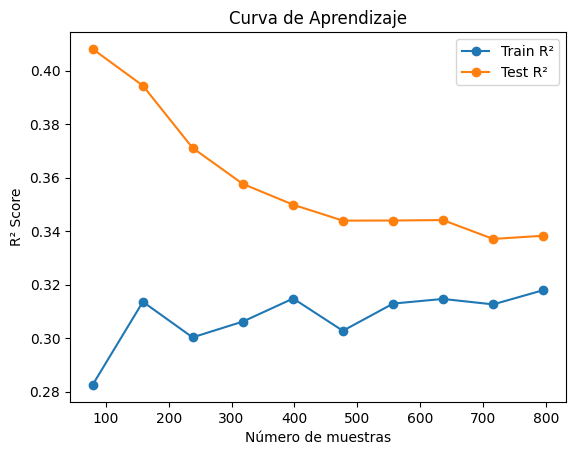

In [127]:
#Graficar la curva de aprendizaje 
plt.plot(train_sizes, train_mean, label="Train R²", marker="o")
plt.plot(train_sizes, test_mean, label="Test R²", marker="o")
plt.xlabel("Número de muestras")
plt.ylabel("R² Score")
plt.legend()
plt.title("Curva de Aprendizaje")

##### Eje X es el Número de muestras que indica la cantidad de datos utilizados para entrenar el modelo.

##### Eje y es el R2 Score que representa la calidad del modelo, donde valores más altos indican un mejor ajuste.

##### Curva azul (Train R2), muestra el desempeño del modelo en los datos de entrenamiento.

##### Curva naranja(Test R2), muestra el desempeño del modelo en los datos de prueba.


### Observaciones claves

1. Distribución del Train R2: Al aumentar el número de muestras, el R2 en el conjunto de entrenamiento disminuye levemente. Esto es normal porque el modelo tiene más datos y no puede ajustarse perfectamente a todos.
2. Rstabilización del Test R2: Inicialmente, el R2 en el conjunto de prueba es alto, pero decrece rápidamente hasta estabilizarse alrededor de 0.34. Esto indica que más datos mejoran la generalización, pero hay un límite en la mejora.
3. Sesgo y varianza: La brecha entre el Train R2 y el Test R2 sugiere que el modelo tiene un cierto sesgo y no captura bien la complejidad de los datos. Además, el valor relativamente bajo del R2 indica que el modelo no está explicando bien la variabilidad de la variable Target.

### Conclusiones
1. El modelo tiene un desempeño razonable, pero los errores siguen siendo grandes en términos absolutos.El objetivo es mejorar el modelo.

##### Posibles mejoras
##### Feature Engineering
1. Revisar si hay más variables relevantes que puedan mejorar el modelo.
##### Ajustar hiperparámetros
1. Optimizar hiperparámetros para reducir el sesgo y mejorar la generalización.
##### Probar otros modelos
1. Probar modelos más complejos, puede que capture mejor los patrones.
##### Detectar y manejar valores atípicos
1. Modelar los valores atípicos.




______________________________________________________________________________________

### Mejorar el ajuste del modelo

1. Aumentar iteraciones: Probar valores mayores a 1500 en max_iter si el modelo aún no converge correctamente.
2. Probar más capas y neuronas: Evaluar configuraciones como (100, 100), (50, 50, 50), etc.
3. Tasa de aprendizaje más baja: probar learning_rate_init = 0.0001, por si hay oscilaciones en la pérdida.

In [129]:
from sklearn.inspection import permutation_importance

#Analizar que variables afectan más el rendimiento del modelo

result = permutation_importance(mejor_modelo_9, X_test_scaled, y_test, scoring='r2', n_repeats=10, random_state=42)
importancia_vars = pd.DataFrame({'Variable': columnas_predictoras, 'Importancia': result.importances_mean})
importancia_vars = importancia_vars.sort_values(by='Importancia', ascending=False)

print(importancia_vars)

                  Variable  Importancia
4          Radiación_Solar     0.002423
0        Temperatura_Media     0.001138
3  Fin_de_semana_o_festivo     0.000590
2         Humedad_Relativa    -0.000339
1             Estación_Año    -0.000489


______________________________________________________________________________________

In [137]:
#Actualizar el conjunto de datos eliminando las variables irrelevantes (Estación_Año y Humedad_Relativa)

columnas_predictoras_nuevas = ['Temperatura_Media', 'Fin_de_semana_o_festivo', 'Radiación_Solar']

X_train_nuevo = X_train[columnas_predictoras_nuevas]
X_test_nuevo = X_test[columnas_predictoras_nuevas]

In [145]:
#Reescalar los datos
scaler_nuevo = StandardScaler()

#Ajustar y transformar los datos con las nuevas variables 
X_train_nuevo_scaled = scaler_nuevo.fit_transform(X_train_nuevo)
X_test_nuevo_scaled = scaler_nuevo.transform(X_test_nuevo)


In [146]:
# Entrenar nuevamente con las variables seleccionadas
grid_search_modelo_9.fit(X_train_nuevo_scaled, y_train_log)

# Obtener el mejor modelo
mejor_modelo_9 = grid_search_modelo_9.best_estimator_

# Hacer predicciones y evaluar
y_pred_9_log = mejor_modelo_9.predict(X_test_nuevo_scaled)
y_pred_9 = np.expm1(y_pred_9_log)

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred_9)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_9))
r2 = r2_score(y_test, y_pred_9)

print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")


Fitting 5 folds for each of 144 candidates, totalling 720 fits
MAE: 121.2759, RMSE: 173.3939, R²: 0.5857


#### Después de ajustar el modelo han empeorado las métricas.